In [1]:
import os          
import cv2
import netron
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import tensorflow as tf
from matplotlib import pyplot
from datetime import datetime      
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
import sklearn.model_selection as model_selection
import dataframe_image as dfi


In [2]:
def load_data(dataset):
    class_names = []
    images = []
    labels = []  
    for folder in os.listdir(dataset):
        class_names.append(folder)    
    class_names_label = {class_name:i for i, class_name in enumerate(class_names)} 
    print("Loading Dataset {}".format(dataset))
    for folder in os.listdir(dataset):
        label = class_names_label[folder]
        for file in tqdm(os.listdir(os.path.join(dataset, folder))):
            img_path = os.path.join(os.path.join(dataset, folder), file)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            IMAGE_SIZE = (150, 150)
            image = cv2.resize(image, IMAGE_SIZE)
            images.append(image)
            labels.append(label)
    return images, labels , class_names

In [13]:
dataset = 'D:/Karnan/Datasets/dataset'
images, labels, class_names = load_data(dataset)

Loading Dataset D:/Karnan/Datasets/dataset


100%|██████████████████████████████████████████████████████████████████████████████████| 44/44 [00:00<00:00, 63.40it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 77/77 [00:01<00:00, 70.79it/s]


In [14]:
images = np.array(images, dtype = 'float32')
labels = np.array(labels, dtype = 'int32') 

In [15]:
images = images/255.0

In [16]:
train_images, test_images, train_labels, test_labels = model_selection.train_test_split(images, labels, train_size=0.80,test_size=0.20, random_state=101) 

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(class_names), activation=tf.nn.softmax)
])

In [18]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(train_images, train_labels, batch_size=128, epochs = 100, validation_split = 0.2)

Epoch 1/100
40/40 [==============================] - 3s 57ms/step - loss: 4.3903 - accuracy: 0.0550 - val_loss: 4.3030 - val_accuracy: 0.0736
Epoch 2/100
40/40 [==============================] - 2s 38ms/step - loss: 4.2115 - accuracy: 0.0692 - val_loss: 4.1338 - val_accuracy: 0.0792
Epoch 3/100
40/40 [==============================] - 1s 37ms/step - loss: 4.0076 - accuracy: 0.0998 - val_loss: 3.9553 - val_accuracy: 0.1080
Epoch 4/100
40/40 [==============================] - 1s 37ms/step - loss: 3.8513 - accuracy: 0.1268 - val_loss: 3.8868 - val_accuracy: 0.1248
Epoch 5/100
40/40 [==============================] - 1s 37ms/step - loss: 3.6895 - accuracy: 0.1488 - val_loss: 3.6931 - val_accuracy: 0.1512
Epoch 6/100
40/40 [==============================] - 1s 37ms/step - loss: 3.5130 - accuracy: 0.1836 - val_loss: 3.5782 - val_accuracy: 0.1608
Epoch 7/100
40/40 [==============================] - 1s 37ms/step - loss: 3.3317 - accuracy: 0.2056 - val_loss: 3.5473 - val_accuracy: 0.1824
Epoch 

40/40 [==============================] - 2s 38ms/step - loss: 0.0377 - accuracy: 0.9908 - val_loss: 10.9181 - val_accuracy: 0.2352
Epoch 59/100
40/40 [==============================] - 1s 37ms/step - loss: 0.0257 - accuracy: 0.9930 - val_loss: 11.1747 - val_accuracy: 0.2272
Epoch 60/100
40/40 [==============================] - 1s 37ms/step - loss: 0.0177 - accuracy: 0.9948 - val_loss: 11.4342 - val_accuracy: 0.2320
Epoch 61/100
40/40 [==============================] - 1s 36ms/step - loss: 0.0312 - accuracy: 0.9944 - val_loss: 11.7582 - val_accuracy: 0.2208
Epoch 62/100
40/40 [==============================] - 2s 38ms/step - loss: 0.0718 - accuracy: 0.9836 - val_loss: 11.2097 - val_accuracy: 0.2448
Epoch 63/100
40/40 [==============================] - 2s 38ms/step - loss: 0.0357 - accuracy: 0.9890 - val_loss: 11.6160 - val_accuracy: 0.2384
Epoch 64/100
40/40 [==============================] - 1s 37ms/step - loss: 0.0243 - accuracy: 0.9924 - val_loss: 12.1193 - val_accuracy: 0.2432
Epoch

In [20]:
model.evaluate(test_images, test_labels)

49/49 [==============================] - 0s 6ms/step - loss: 13.2452 - accuracy: 0.2495


[13.245190620422363, 0.24952015280723572]

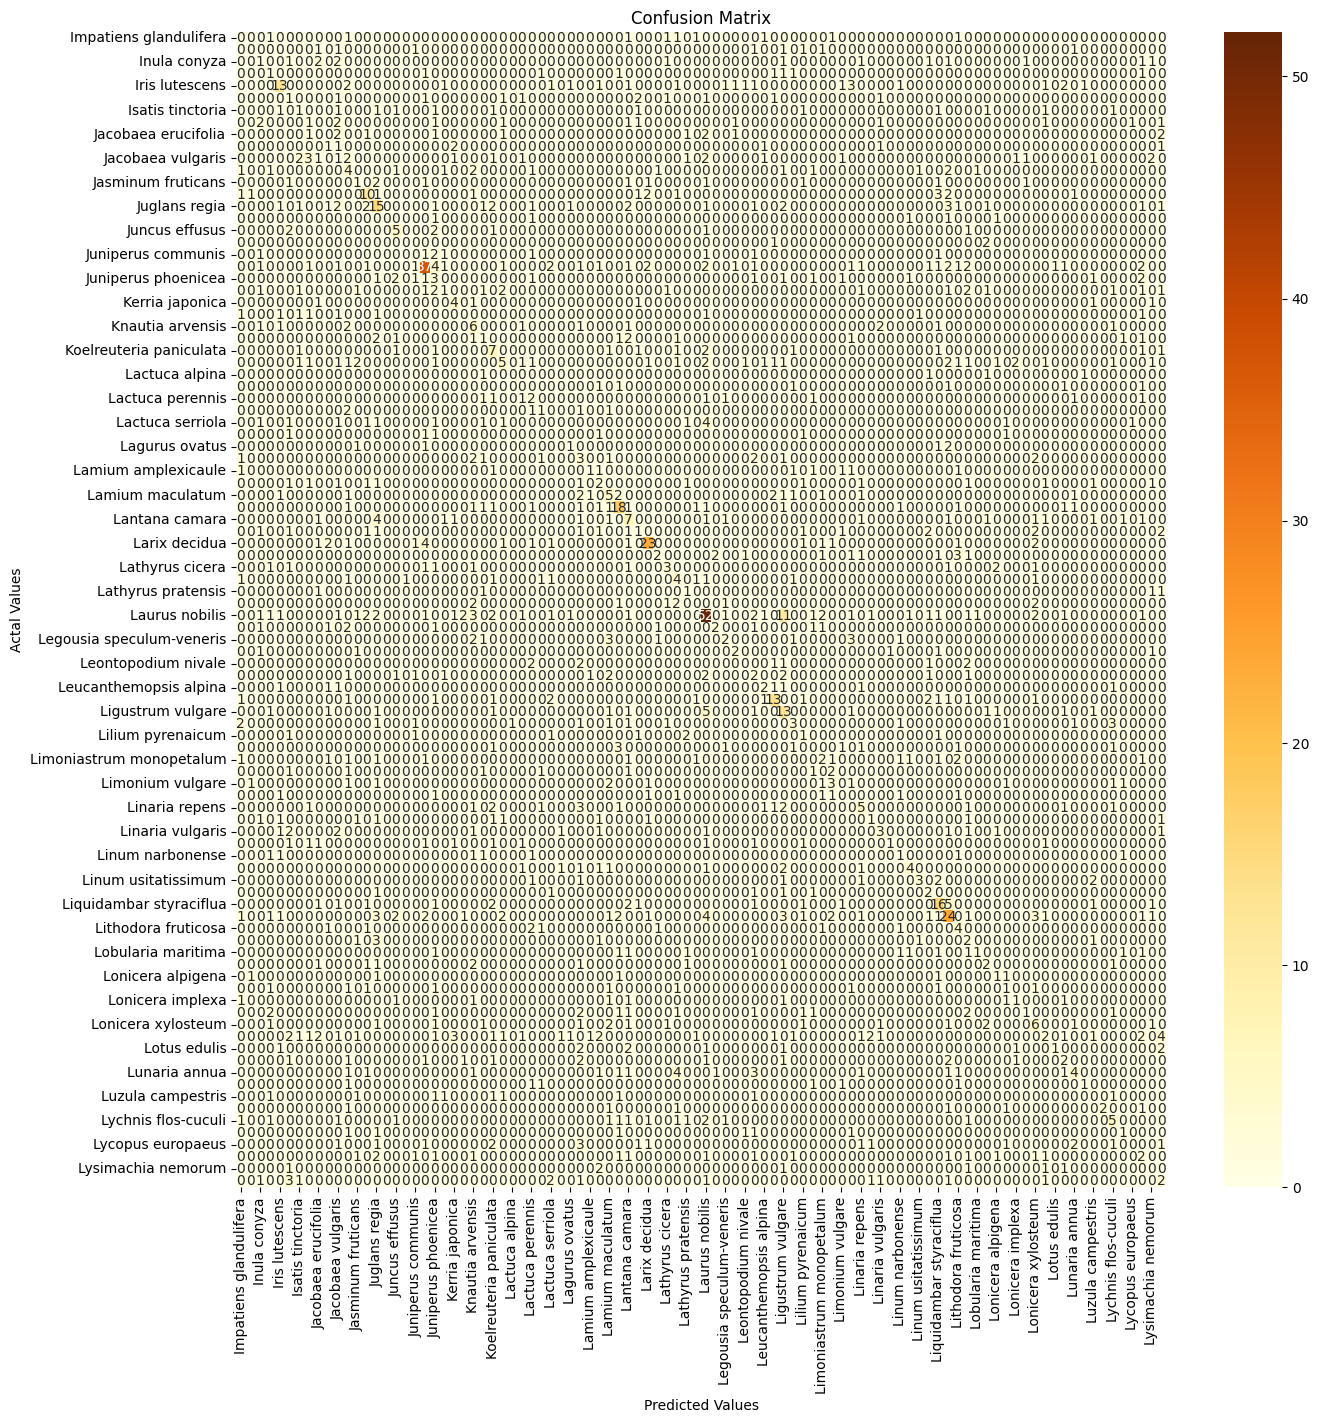

In [22]:
def measures(y_actual, y_pred):
    confusion_matrix_df = pd.DataFrame(confusion_matrix(actual,predictions),index = class_names, columns =class_names)

    FP = abs(confusion_matrix_df.sum(axis=0) - np.diag(confusion_matrix_df)) 
    FN = abs(confusion_matrix_df.sum(axis=1) - np.diag(confusion_matrix_df))
    TP = np.diag(confusion_matrix_df)
    TN = abs(confusion_matrix_df.sum() - (FP + FN + TP))
    NPV = TN/(TN+FN)
    FDR = FP/(TP+FP)
    FNR = FP/(FP+TN)
    Accuracy = (TP + TN) / (TP + FP + FN + TN)
    Error_rate = (FP + FN) / (TP + FP + FN + TN)
    Precision = TP / (TP + FP)
    Recall = TP / (TP + FN )
    F_measure = (2 * Recall * Precision) / (Recall + Precision)
    FPR = FN/(TP+FN)
    Specificity = TN/(TN+FP)
    
    
    dict = {}
    dict['class_name'] = class_names
    dict['TP'] = TP
    dict['FP'] = FP
    dict['TN'] = TN
    dict['FN'] = FN
    measures1 = pd.DataFrame(dict)

    dict1 = {}
    dict1['class_name'] = class_names 
    dict1['Accuracy'] = Accuracy *100
    dict1['Precision'] = Precision *100
    dict1['Recall'] = Recall*100
    dict1['F_measure'] = F_measure*100
    dict1['Error_rate'] = Error_rate*100
    dict1['Specificity'] = Specificity*100
    dict1['FNR'] = FNR*100
    dict1['FPR'] = FPR*100
    
    measures = pd.DataFrame(dict1)
    
    measures2 = pd.merge(measures1,measures )                            
    new_row = {'class_name': 'Average', 'TP':np.round(np.average(TP),2), 
               'FP': np.round(np.average(FP),2), 'TN': np.round( np.average(TN),2), 
               'FN': np.round(np.average(FN),2), 'Accuracy': np.round(np.average(Accuracy)*100,2), 'Precision': np.round(np.average(Precision)*100,2),
               'Recall': np.round(np.average(Recall)*100,2), 'F_measure': np.round(np.average(F_measure)*100,2), 
               'Error_rate': np.round( np.average(Error_rate)*100,2), 'Specificity':  np.round( np.average(Specificity)*100,2), 
               'FNR': np.round( np.average(FNR)*100,2), 'FPR': np.round(np.average(FPR)*100,2)}

    measures2.loc['Average'] = new_row



    plt.figure(figsize=(15,15))
    sns.heatmap(confusion_matrix_df, annot=True,cmap = pyplot.cm.YlOrBr)
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()
    
  

    
    return measures2
    
predictions = np.argmax(model.predict(test_images), axis = 1)
actual = test_labels
measures  = measures(actual, predictions)
measures.to_csv("measures.csv", index=False,float_format='%.2f')
measures =pd.read_csv("measures.csv")
measures.TP = measures.TP.astype(int)
measures.FP = measures.FP.astype(int)
measures.TN = measures.TN.astype(int)
measures.FN = measures.FN.astype(int)
measures.iloc[-1,1:5] = ''
measures
dfi.export(measures, "Measures.png")

In [12]:
import dataframe_image as dfi
dfi.export(measures, "table.png")